# Jinteki.net Game Log Analysis

Import useful packages

In [1]:
import Pkg; 
Pkg.add("StatsPlots"); 
Pkg.add("CSV");
Pkg.add("DataFrames");
Pkg.add("DataFramesMeta");
Pkg.add("StatsBase");

using StatsBase;
using CSV;
using DataFrames;
using DataFramesMeta;
using StatsPlots;

    Updating registry at `/opt/julia/registries/General`
   Resolving package versions...
   Installed Xorg_libxcb_jll ────────────── v1.13.0+3
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed Rmath_jll ──────────────────── v0.3.0+0
   Installed StatsPlots ─────────────────── v0.14.29
   Installed Glib_jll ───────────────────── v2.68.3+1
   Installed MultivariateStats ──────────── v0.8.0
   Installed Plots ──────────────────────── v1.25.1
   Installed Rmath ──────────────────────── v0.7.0
   Installed Distributions ──────────────── v0.25.34
   Installed xkbcommon_jll ──────────────── v0.9.1+5
   Installed LAME_jll ───────────────────── v3.100.1+0
   Installed libpng_jll ─────────────────── v1.6.38+0
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed x264_jll ───────────────────── v2021.5.5+0
   Installed IniFile ────────────────────── v0.5.0
   Installed NaNMath ────────────────────── v0.3.5
   Installed WoodburyMatrices ───────────── v0.5.5
   Installed

## Load the data

In [2]:
df = DataFrame(CSV.File("20211208_games.csv"))

,date,time,turn,room,format,winner,reason,corp
,Int64,Int64,Int64?,String15,String15,String7?,String15?,String63?
1,20211208,2,missing,casual,startup,missing,missing,Jinteki: Restoring Humanity
2,20211208,3,missing,casual,standard,missing,missing,Pālanā Foods: Sustainable Growth
3,20211208,5,missing,casual,standard,missing,missing,Sportsmetal: Go Big or Go Home
4,20211208,6,missing,casual,startup,missing,missing,Haas-Bioroid: Architects of Tomorrow
5,20211208,9,missing,casual,standard,missing,missing,The Outfit: Family Owned and Operated
6,20211208,13,10,casual,startup,runner,Agenda,Jinteki: Personal Evolution
7,20211208,14,missing,casual,standard,missing,missing,NBN: Controlling the Message
8,20211208,9,13,casual,startup,runner,Agenda,Haas-Bioroid: Architects of Tomorrow
9,20211208,16,missing,casual,standard,missing,missing,Argus Security: Protection Guaranteed


In [3]:
size(df)

(111112, 9)

In [4]:
describe(df)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,date,2.0211e7,20210720,2.02109e7,20211208
2,time,224.808,0,16.0,192760
3,turn,11.945,0,12.0,56
4,room,,angel-arena,,competitive
5,format,,casual,,system-gateway
6,winner,,corp,,runner
7,reason,,Agenda,,Tie
8,corp,,Acme Consulting: The Truth You Need,,Weyland Consortium: Built to Last
9,runner,,419: Amoral Scammer,,Zahya Sadeghi: Versatile Smuggler


In [5]:
last(df, 5)

,date,time,turn,room,format,winner,reason,corp
,Int64,Int64,Int64?,String15,String15,String7?,String15?,String63?
1,20210720,30,10,casual,standard,corp,Agenda,Weyland Consortium: Built to Last
2,20210720,33,13,casual,startup,corp,Agenda,Jinteki: Personal Evolution
3,20210720,31,28,casual,standard,corp,Agenda,Asa Group: Security Through Vigilance
4,20210720,11,9,casual,startup,runner,Agenda,Jinteki: Restoring Humanity
5,20210720,27,11,casual,startup,corp,Agenda,Haas-Bioroid: Precision Design


In [6]:
missing_corp = length(findall(x -> ismissing(x), df.corp))

712

In [7]:
missing_runner = length(findall(x -> ismissing(x), df.runner))

849

In [8]:
no_winner = length(findall(x -> ismissing(x), df.winner))

4995

In [9]:
complete = df[completecases(df), :]
disallowmissing!(complete)
size(complete)

(105371, 9)

# Game Length

In [10]:
describe(complete.turn)

Summary Stats:
Length:         105371
Missing Count:  0
Mean:           12.342495
Minimum:        0.000000
1st Quartile:   9.000000
Median:         12.000000
3rd Quartile:   16.000000
Maximum:        56.000000
Type:           Int64


In [11]:
zero_turns = length(findall(x -> x === 0, complete.turn))

647

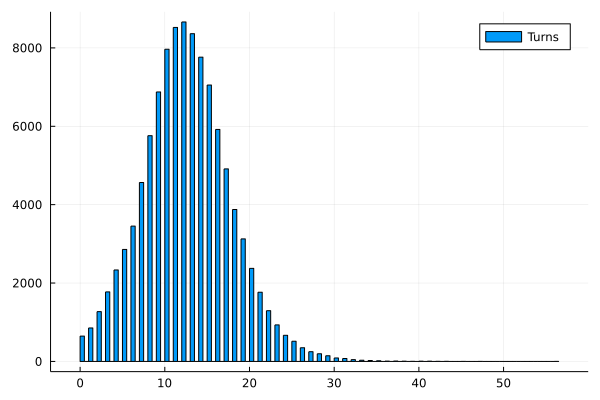

In [12]:
histogram(complete.turn, label="Turns")

In [13]:
describe(complete.time)

Summary Stats:
Length:         105371
Missing Count:  0
Mean:           20.460544
Minimum:        0.000000
1st Quartile:   10.500000
Median:         17.000000
3rd Quartile:   26.000000
Maximum:        219.000000
Type:           Int64


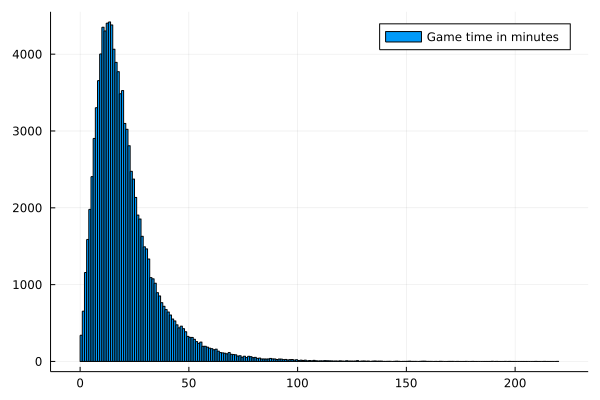

In [14]:
histogram(complete.time, label="Game time in minutes")

In [15]:
with_time_no_max = @where(complete, :time .<= 120, :time .>= 2, :turn .!= 0)
describe(with_time_no_max.time)

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /opt/julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


Summary Stats:
Length:         104129
Missing Count:  0
Mean:           20.503702
Minimum:        2.000000
1st Quartile:   11.000000
Median:         17.000000
3rd Quartile:   26.000000
Maximum:        120.000000
Type:           Int64


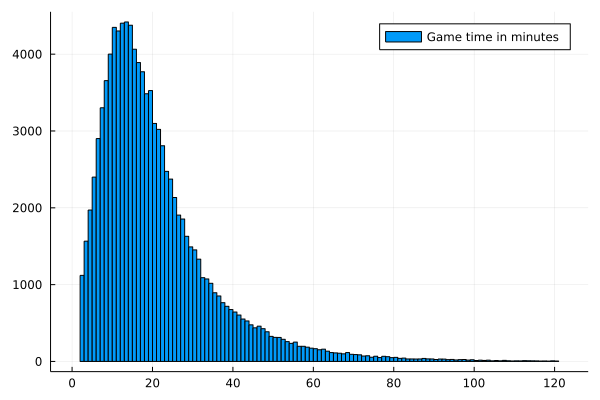

In [16]:
histogram(with_time_no_max.time, label="Game time in minutes")

# Game Outcomes

In [17]:
t0_concede = @where(complete, :turn .== 0, :reason .== "Concede")
size(t0_concede)

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /opt/julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


(642, 9)

In [18]:
t1_concede = @where(complete, :turn .== 1, :reason == "Concede")

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /opt/julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


LoadError: ArgumentError: functions passed to `subset` must return an AbstractVector.

In [19]:
t0_runner_concede = @where(t0_concede, :winner .== "corp")

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /opt/julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


,date,time,turn,room,format,winner,reason,corp
,Int64,Int64,Int64,String15,String15,String7,String15,String63
1,20211208,0,0,casual,standard,corp,Concede,Near-Earth Hub: Broadcast Center
2,20211207,2,0,casual,standard,corp,Concede,NBN: Controlling the Message
3,20211205,0,0,casual,standard,corp,Concede,AgInfusion: New Miracles for a New World
4,20211204,30,0,casual,snapshot-plus,corp,Concede,Weyland Consortium: Building a Better World
5,20211203,0,0,casual,system-gateway,corp,Concede,Haas-Bioroid: Precision Design
6,20211203,4,0,casual,system-gateway,corp,Concede,The Syndicate: Profit over Principle
7,20211203,0,0,casual,eternal,corp,Concede,Industrial Genomics: Growing Solutions
8,20211203,1,0,casual,standard,corp,Concede,Gagarin Deep Space: Expanding the Horizon
9,20211203,0,0,casual,standard,corp,Concede,Acme Consulting: The Truth You Need


In [20]:
rc = countmap(t0_runner_concede.corp)
reverse(sort(collect(rc), by=x->x[2]))

33-element Vector{Pair{String63, Int64}}:
                 "Jinteki: Personal Evolution" => 88
                "NBN: Controlling the Message" => 82
            "Pālanā Foods: Sustainable Growth" => 22
              "Haas-Bioroid: Precision Design" => 21
            "Near-Earth Hub: Broadcast Center" => 14
              "Sportsmetal: Go Big or Go Home" => 13
         "Acme Consulting: The Truth You Need" => 12
           "Weyland Consortium: Built to Last" => 12
                           "NBN: Reality Plus" => 11
        "The Syndicate: Profit over Principle" => 11
       "Asa Group: Security Through Vigilance" => 11
   "Gagarin Deep Space: Expanding the Horizon" => 10
      "Weyland Consortium: Builder of Nations" => 10
                                               ⋮
       "Argus Security: Protection Guaranteed" => 3
      "Industrial Genomics: Growing Solutions" => 3
        "Haas-Bioroid: Architects of Tomorrow" => 3
           "Azmari EdTech: Shaping the Future" => 3
    "AgInfus

In [21]:
t0_corp_concede = @where(t0_concede, :winner .== "runner")

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /opt/julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


,date,time,turn,room,format,winner,reason,corp
,Int64,Int64,Int64,String15,String15,String7,String15,String63
1,20211208,0,0,casual,startup,runner,Concede,Haas-Bioroid: Precision Design
2,20211208,9,0,casual,standard,runner,Concede,Near-Earth Hub: Broadcast Center
3,20211207,1,0,casual,standard,runner,Concede,NBN: Reality Plus
4,20211204,4,0,casual,standard,runner,Concede,Jinteki: Restoring Humanity
5,20211204,0,0,casual,standard,runner,Concede,MirrorMorph: Endless Iteration
6,20211204,0,0,casual,standard,runner,Concede,MirrorMorph: Endless Iteration
7,20211204,1,0,casual,startup,runner,Concede,Earth Station: SEA Headquarters
8,20211203,1,0,casual,standard,runner,Concede,Jemison Astronautics: Sacrifice. Audacity. Success.
9,20211202,3,0,casual,startup,runner,Concede,Weyland Consortium: Built to Last


In [22]:
cc = countmap(t0_corp_concede.runner)
reverse(sort(collect(cc), by=x->x[2]))

34-element Vector{Pair{String, Int64}}:
                      "419: Amoral Scammer" => 27
                  "MaxX: Maximum Punk Rock" => 23
        "Zahya Sadeghi: Versatile Smuggler" => 17
       "Tāo Salonga: Telepresence Magician" => 16
        "Hoshiko Shiro: Untold Protagonist" => 15
                  "Adam: Compulsive Hacker" => 15
          "Steve Cambridge: Master Grifter" => 14
         "The Catalyst: Convention Breaker" => 12
     "René \"Loup\" Arcemont: Party Animal" => 10
         "Az McCaffrey: Mechanical Prodigy" => 10
 "Ayla \"Bios\" Rahim: Simulant Specialist" => 8
        "Sunny Lebeau: Security Specialist" => 8
       "Kabonesa Wu: Netspace Thrillseeker" => 7
                                            ⋮
            "Edward Kim: Humanity's Hammer" => 3
   "Kate \"Mac\" McCaffrey: Digital Tinker" => 3
                       "Los: Data Hijacker" => 3
         "Hayley Kaplan: Universal Scholar" => 3
                   "Khan: Savvy Skiptracer" => 2
           "Andromeda:

In [23]:
countmap(complete.winner)

Dict{String7, Int64} with 2 entries:
  "runner" => 45708
  "corp"   => 59663

In [24]:
countmap(complete.reason)

Dict{String15, Int64} with 4 entries:
  "Flatline" => 16364
  "Decked"   => 365
  "Concede"  => 22904
  "Agenda"   => 65738

In [25]:
no_concedes = @where(complete, :reason .!= "Concede")
size(no_concedes)

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /opt/julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


(82467, 9)

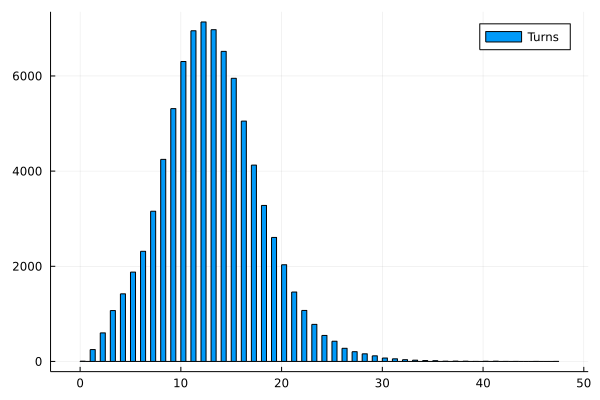

In [26]:
histogram(no_concedes.turn, label="Turns")

In [27]:
describe(no_concedes.turn)

Summary Stats:
Length:         82467
Missing Count:  0
Mean:           12.838602
Minimum:        0.000000
1st Quartile:   10.000000
Median:         13.000000
3rd Quartile:   16.000000
Maximum:        47.000000
Type:           Int64


In [31]:
long_game = @where(complete, :turn .=== 47)

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /opt/julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


,date,time,turn,room,format,winner,reason,corp
,Int64,Int64,Int64,String15,String15,String7,String15,String63
1,20211129,33,47,casual,standard,runner,Agenda,Pālanā Foods: Sustainable Growth
2,20211122,32,47,casual,standard,corp,Agenda,Pālanā Foods: Sustainable Growth


In [32]:
long_game[:, [:turn, :winner, :reason, :corp, :runner]]

,turn,winner,reason,corp,runner
,Int64,String7,String15,String63,String
1,47,runner,Agenda,Pālanā Foods: Sustainable Growth,Adam: Compulsive Hacker
2,47,corp,Agenda,Pālanā Foods: Sustainable Growth,Zahya Sadeghi: Versatile Smuggler


In [33]:
concedes = @where(complete, :reason .== "Concede")

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /opt/julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


,date,time,turn,room,format,winner,reason,corp
,Int64,Int64,Int64,String15,String15,String7,String15,String63
1,20211208,14,27,casual,standard,runner,Concede,Argus Security: Protection Guaranteed
2,20211208,13,15,casual,standard,corp,Concede,Earth Station: SEA Headquarters
3,20211208,8,13,casual,startup,corp,Concede,Weyland Consortium: Built to Last
4,20211208,16,13,casual,startup,corp,Concede,Haas-Bioroid: Precision Design
5,20211208,7,7,casual,standard,runner,Concede,Acme Consulting: The Truth You Need
6,20211208,17,14,casual,startup,corp,Concede,Weyland Consortium: Built to Last
7,20211208,2,2,casual,standard,runner,Concede,NBN: Controlling the Message
8,20211208,10,13,casual,standard,corp,Concede,NBN: Controlling the Message
9,20211208,24,19,casual,startup,corp,Concede,Weyland Consortium: Built to Last


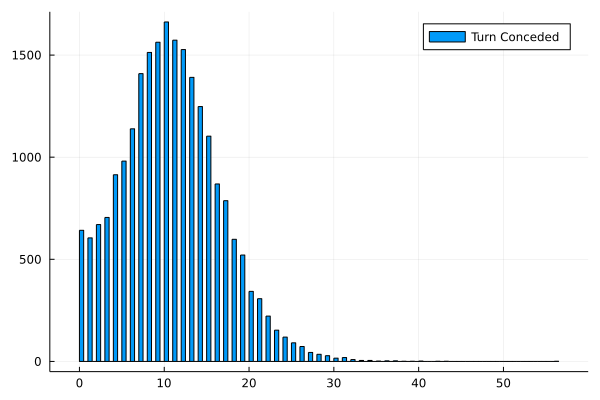

In [34]:
histogram(concedes.turn, label="Turn Conceded")

In [35]:
format_count = countmap(complete.format)

Dict{String15, Int64} with 8 entries:
  "system-gateway" => 2677
  "classic"        => 97
  "startup"        => 26430
  "casual"         => 10577
  "standard"       => 63816
  "snapshot-plus"  => 54
  "eternal"        => 1709
  "snapshot"       => 11